NETFLIX RECOMMENDATION

This dataset consists if TV shows and movies on Netflix in various countries as of 2020.
The dataset can be found on Kaggle

Let us import some libraries

In [1]:
import pandas as pd
import numpy as np
import csv
import collections
from collections import Counter

OBJECTIVES:
* Understanding what content is available in different countries
* Determeine whether Netflix has increasingly focusing on TV rather than movies in recent years.
* Identifying similar content by matching text-based features

1) DATA PREPROCESSING

In [4]:
netflix=pd.read_csv('C:\\Users\\Naren\\Documents\\Codes\\netflix-shows\\netflix_titles.csv')
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [5]:
len(netflix[netflix['type']=='Movie'])

4265

In [6]:
len(netflix[netflix['type']=='TV Show'])

1969

There are 4265 movies and 1969 TV Shows


In [7]:
list(netflix[netflix['date_added'].isna()]['title'])

['Gunslinger Girl',
 'Anthony Bourdain: Parts Unknown',
 'Frasier',
 'La Familia P. Luche',
 'The Adventures of Figaro Pho',
 'Kikoriki',
 'Red vs. Blue',
 'Maron',
 'Little Baby Bum: Nursery Rhyme Friends',
 "A Young Doctor's Notebook and Other Stories",
 'Friends']

In [8]:
len(list(netflix[netflix['date_added'].isna()]['title']))

11

There are 11 shows which are no longer on Netflix


In [9]:
netflix=netflix[netflix['date_added'].notna()]
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


Handling missing values

In [10]:
netflix['director']=netflix['director'].fillna("")
netflix['rating']=netflix['rating'].fillna("")
netflix['date_added']=pd.to_datetime(netflix['date_added'])
netflix['year_added']=netflix['date_added'].dt.year
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019
1,80117401,Movie,Jandino: Whatever it Takes,,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016
2,70234439,TV Show,Transformers Prime,,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",2018
3,80058654,TV Show,Transformers: Robots in Disguise,,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,2018
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017


* Understanding content in different countries

In [11]:
from collections import Counter
count_countries=Counter(",".join(netflix['country'].dropna()).split(","))
print(count_countries)

Counter({'United States': 2296, 'India': 808, 'United Kingdom': 482, ' United States': 308, 'Canada': 206, 'Japan': 183, 'France': 147, 'South Korea': 146, 'Spain': 139, ' France': 124, ' United Kingdom': 119, ' Canada': 112, 'Mexico': 99, 'Australia': 93, ' Germany': 86, 'Turkey': 83, 'China': 77, 'Hong Kong': 73, 'Taiwan': 71, 'Germany': 65, 'Brazil': 57, 'Argentina': 56, 'Thailand': 53, 'Egypt': 52, ' Belgium': 51, 'Indonesia': 48, ' Japan': 47, 'Philippines': 46, ' China': 43, 'Italy': 40, ' Spain': 39, 'Nigeria': 36, ' Australia': 32, ' India': 30, ' Mexico': 30, 'Colombia': 29, 'Denmark': 28, ' Italy': 27, ' Hong Kong': 24, 'Ireland': 22, ' Sweden': 21, 'Pakistan': 21, 'Israel': 20, 'Netherlands': 19, 'Singapore': 19, 'Chile': 18, ' Netherlands': 18, 'Malaysia': 18, ' South Africa': 18, 'Poland': 17, ' South Korea': 16, 'Norway': 16, 'Russia': 16, 'Belgium': 15, ' Argentina': 12, 'South Africa': 12, 'New Zealand': 12, 'Sweden': 12, ' Ireland': 11, ' United Arab Emirates': 11, ' N

In [12]:
top_10_countries=count_countries.most_common(10)
top_10_countries

[('United States', 2296),
 ('India', 808),
 ('United Kingdom', 482),
 (' United States', 308),
 ('Canada', 206),
 ('Japan', 183),
 ('France', 147),
 ('South Korea', 146),
 ('Spain', 139),
 (' France', 124)]

In [13]:
country_name=[]
country_count=[]
for i in range(10):
    country_name.append(top_10_countries[i][0])
    
print(country_name)

['United States', 'India', 'United Kingdom', ' United States', 'Canada', 'Japan', 'France', 'South Korea', 'Spain', ' France']


In [14]:
for i in range(10):
    country_count.append(top_10_countries[i][1])
    
print(country_count)

[2296, 808, 482, 308, 206, 183, 147, 146, 139, 124]


In [15]:
import matplotlib.pyplot as plt
y_pos=np.arange(len(country_name))
plt.barh(y_pos, country_count, align='center', alpha=0.5)
plt.yticks(y_pos, country_name)
plt.xlabel('Count')
plt.title('Top 10 Countries')
plt.show()

<Figure size 640x480 with 1 Axes>

We are also interested in the genres that are preffered the most

In [16]:
count_genre=Counter(",".join(netflix['listed_in'].dropna()).split(","))
print(count_genre)

Counter({' International Movies': 1842, 'Dramas': 1077, 'Comedies': 803, 'Documentaries': 644, 'Action & Adventure': 597, 'International TV Shows': 569, ' Dramas': 546, ' TV Dramas': 542, ' Independent Movies': 534, ' International TV Shows': 431, ' Romantic Movies': 374, 'Children & Family Movies': 358, ' Thrillers': 352, ' TV Comedies': 341, ' Comedies': 310, 'Crime TV Shows': 309, "Kids' TV": 286, 'Stand-Up Comedy': 273, ' Romantic TV Shows': 257, ' Music & Musicals': 231, 'British TV Shows': 209, 'Horror Movies': 205, ' Sci-Fi & Fantasy': 183, ' Sports Movies': 156, 'Docuseries': 147, ' Korean TV Shows': 132, ' Docuseries': 131, 'Anime Series': 116, ' Spanish-Language TV Shows': 115, ' TV Action & Adventure': 96, ' Reality TV': 90, 'TV Comedies': 88, 'International Movies': 85, ' TV Mysteries': 69, ' Science & Nature TV': 67, ' TV Sci-Fi & Fantasy': 66, 'Reality TV': 63, 'Classic Movies': 62, ' LGBTQ Movies': 60, ' Horror Movies': 57, 'TV Dramas': 56, 'Movies': 55, ' Crime TV Shows

In [17]:
top_10_genre=count_genre.most_common(10)
print(top_10_genre)

[(' International Movies', 1842), ('Dramas', 1077), ('Comedies', 803), ('Documentaries', 644), ('Action & Adventure', 597), ('International TV Shows', 569), (' Dramas', 546), (' TV Dramas', 542), (' Independent Movies', 534), (' International TV Shows', 431)]


In [18]:
genre_name=[]
genre_count=[]
for i in range(10):
    genre_name.append(top_10_genre[i][0])
for i in range(10):
    genre_count.append(top_10_genre[i][1])
    
    
print(genre_count)
print(genre_name)

[1842, 1077, 803, 644, 597, 569, 546, 542, 534, 431]
[' International Movies', 'Dramas', 'Comedies', 'Documentaries', 'Action & Adventure', 'International TV Shows', ' Dramas', ' TV Dramas', ' Independent Movies', ' International TV Shows']


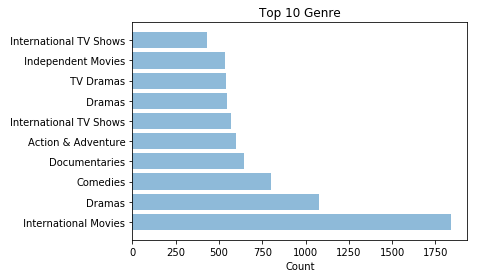

In [19]:
y_pos=np.arange(len(genre_name))
plt.barh(y_pos, genre_count, align='center', alpha=0.5)
plt.yticks(y_pos, genre_name)
plt.xlabel('Count')
plt.title('Top 10 Genre')
plt.show()

Now let us take a look at the genres prefered in various countries

In [20]:
def by_country(df,country):
    drop_country_na=df[df['country'].notna()]
    return drop_country_na[drop_country_na['country'].str.contains(country)]


In [21]:

def top_genre_by_country(df,country):
    genre_counter = Counter(", ".join(by_country(netflix, country)['listed_in']).split(", "))
    genre_counter1=genre_counter.most_common(10)
    genre_name=[]
    genre_count=[]
    for i in range(10):
        genre_name.append(genre_counter1[i][0])
        genre_count.append(genre_counter1[i][1])
    return genre_name, genre_count

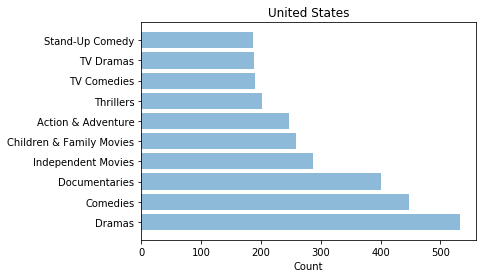

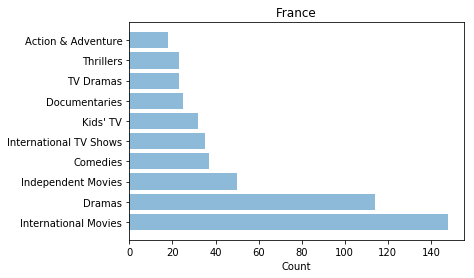

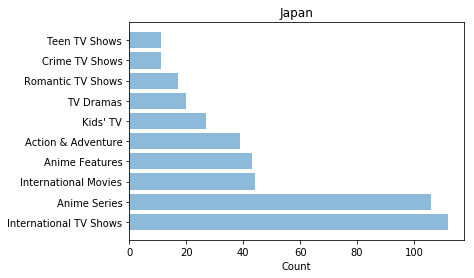

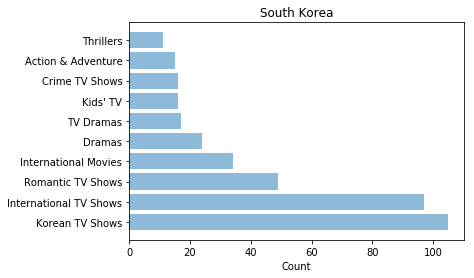

In [22]:
countries=['United States', 'France', 'Japan', 'South Korea']
for i in np.arange(len(countries)):
    genre=[]
    count=[]
    genre,count=top_genre_by_country(netflix,countries[i])
    
    y_pos=np.arange(len(genre))
    plt.barh(y_pos, count, align='center', alpha=0.5)
    plt.yticks(y_pos, genre)
    plt.xlabel('Count')
    plt.title(countries[i])
    plt.show()
    
    

* Determining if Netflix is focusing more on TV shows than movies over the years

In [23]:
shows_by_year=netflix[netflix['type']=='TV Show'].groupby('year_added').size()
shows_by_year.head()

year_added
2008     1
2012     3
2013     6
2014     6
2015    32
dtype: int64

In [24]:
movies_by_year=netflix[netflix['type']=='Movie'].groupby('year_added').size()
movies_by_year.head()

year_added
2008     1
2009     2
2010     1
2011    13
2012     4
dtype: int64

In [25]:
movies_by_year=movies_by_year.to_frame()
movies_by_year=movies_by_year.reset_index('year_added')
movies_by_year.head()

,year_added,0
0,2008,1
1,2009,2
2,2010,1
3,2011,13
4,2012,4


In [26]:
shows_by_year=shows_by_year.to_frame()
shows_by_year=shows_by_year.reset_index('year_added')
shows_by_year.head()

,year_added,0
0,2008,1
1,2012,3
2,2013,6
3,2014,6
4,2015,32


In [27]:
movies_by_year.rename( columns={0:'movies_no'}, inplace=True )
shows_by_year.rename( columns={0:'shows_no'}, inplace=True )



In [28]:
movies_by_year.head()

,year_added,movies_no
0,2008,1
1,2009,2
2,2010,1
3,2011,13
4,2012,4


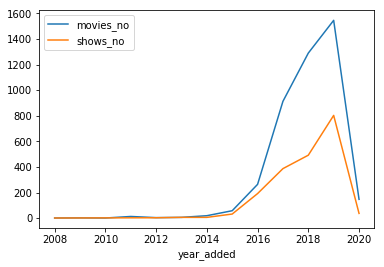

In [29]:
ax = plt.gca()

movies_by_year.plot(kind='line',x='year_added',y='movies_no',ax=ax)
shows_by_year.plot(kind='line',x='year_added',y='shows_no',ax=ax)

plt.show()

This shows that Netflix has more movies than TV shows and hence there is not strong evidence that Netflix is focusing on TV shows

* Content-based recommendation

In [30]:
import nltk
import re
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

Let us create a column called 'aggregated_text' which is a concatenation of 'description','listed_in','director' and 'rating'.

In [31]:
netflix=netflix[netflix['title'].notna()]
netflix['aggregated_text']=netflix['description'].str.lower()+""+netflix['listed_in'].str.lower()+""+netflix['rating'].str.lower()+netflix['director'].str.lower()
corpus=list(netflix['aggregated_text'].str.split())
stopwords_list=set(stopwords.words("english"))
index=list(range(0,len(corpus)))
clean_corpus=[]

for sentence in corpus:
    s=[]
    for word in sentence:
        clean_word=re.sub(r'[^\w\s]','', word)
        if clean_word not in stopwords_list:
            s.append(clean_word)
        clean_corpus.append(" ".join(s))    
    

TF*IDF is an information retrieval technique that weighs a term’s frequency (TF) and its inverse document frequency (IDF). Each word or term has its respective TF and IDF score. The product of the TF and IDF scores of a term is called the TF*IDF weight of that term.

The TF*IDF algorithm is used to weigh a keyword in any content and assign the importance to that keyword based on the number of times it appears in the document. More importantly, it checks how relevant the keyword is throughout the web, which is referred to as corpus.

In [32]:
tfidf_vectorizer = TfidfVectorizer().fit_transform(clean_corpus)

In [33]:
def get_recommendation(show_list, vectorizer):

    title, scores, genre = [], [], []
    for show_name in show_list:
        show_index = netflix[netflix['title'] == show_name].index[0]
        cosine_similarities = linear_kernel(vectorizer[show_index], vectorizer).flatten()
        similar_show_index = cosine_similarities.argsort()[:-7:-1][1:]
        title += [netflix['title'][i] for i in similar_show_index]
        genre += [netflix['listed_in'][i] for i in similar_show_index]
        scores += list(cosine_similarities[similar_show_index])

    df = pd.DataFrame(data = {'Title': title, 
                                 'Genre': genre,
                                 'Cosine_similarity': scores})

    df = df[~df['Title'].isin(show_list)].sort_values('Cosine_similarity', ascending = False)
    df['Title'] = df['Title'].drop_duplicates()
    top_five_list = df[df['Title'].notna()].iloc[0:5, :]
    
    return top_five_list

In [34]:
watched_shows = ['Narcos', 'The Vampire Diaries', 'Transformers Prime']
get_recommendation(watched_shows, tfidf_vectorizer)

,Title,Genre,Cosine_similarity
0,Robocar Poli,"Kids' TV, Korean TV Shows",1.000000
5,Gotham,"Crime TV Shows, TV Action & Adventure, TV Dramas",0.990294
6,Real Rob,TV Comedies,0.976505
1,Toast of London,"British TV Shows, Classic & Cult TV, TV Comedies",0.937772
7,Jack Whitehall: Travels with My Father,"British TV Shows, Docuseries, International TV...",0.929156


The above five titles are the recommendations for the 3 shows I have watched.